# Introduction

Notebook - Classification Hackathon


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package punkt to C:\Users\Kiren
[nltk_data]     Sewnath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Kiren
[nltk_data]     Sewnath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read csv Files

In [42]:
# load dataset from csv file into dataframes
missing_values = ['n/a', 'na', '--', '', 'NaN', 'NULL', 'Null', 'N/A', 'NA', '-', 'inf', '-inf']
df_train = pd.read_csv('train_set.csv', na_values = missing_values)
df_test = pd.read_csv('test_set.csv', na_values = missing_values)

In [43]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,index,lang_id
0,1,tsn
1,2,nbl


In [44]:
# Peek into training dataset
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [45]:
# Peek into testing dataset
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


# Initial Cleaning
Initial cleaning to be able to perform EDA. Get data in usable format

Train Data

In [46]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Test Data

# Exploratory Data Analysis
Understand the data, patterns in the data, pinpoint outliers and indicate relationships between variables and label. Using descriptive statistics and data visualisation - univariate and multivariate analysis.

Train Data

In [47]:
labels = df_train['lang_id'].unique()
labels

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

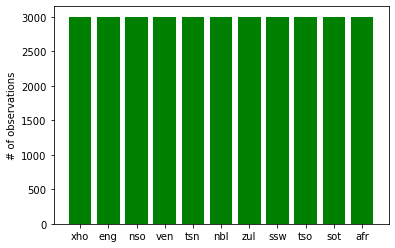

In [48]:
# Get distrbution of labels
labels = df_train['lang_id'].unique()
heights = [len(df_train[df_train['lang_id']=='xho']),
           len(df_train[df_train['lang_id']=='eng']),
           len(df_train[df_train['lang_id']=='nso']),
           len(df_train[df_train['lang_id']=='ven']),
          len(df_train[df_train['lang_id']=='tsn']), 
           len(df_train[df_train['lang_id']=='nbl']),
          len(df_train[df_train['lang_id']=='zul']),
          len(df_train[df_train['lang_id']=='ssw']),
          len(df_train[df_train['lang_id']=='tso']),
          len(df_train[df_train['lang_id']=='sot']),
          len(df_train[df_train['lang_id']=='afr'])]
plt.bar(labels,heights,color='green')
plt.xticks(labels,['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'])
plt.ylabel("# of observations")
plt.show()

In [49]:
#Extract features from text
from sklearn.feature_extraction.text import CountVectorizer
vect1 = CountVectorizer(lowercase=True, analyzer='word')
X_text = vect1.fit_transform(df_train['text'])
X_text.shape, vect1.get_feature_names()

((33000, 7000),
 ['aan',
  'aan die',
  'aan te',
  'aangestel',
  'aansoek',
  'aansoek doen',
  'aansoeke',
  'aansoeker',
  'aanvaar',
  'aba',
  'ababili',
  'abadala',
  'abafundi',
  'abalimi',
  'abalingani',
  'abantu',
  'abantu abadala',
  'abantwana',
  'abanye',
  'abaphathi',
  'abasebenza',
  'abasebenzi',
  'abasebenzisi',
  'abazali',
  'abe',
  'abelwa',
  'abo',
  'about',
  'above',
  'abuye',
  'access',
  'access to',
  'accordance',
  'accordance with',
  'account',
  'accounting',
  'accused',
  'act',
  'act act',
  'act and',
  'act no',
  'act of',
  'action',
  'activities',
  'additional',
  'address',
  'adjusted',
  'administrasie',
  'administration',
  'af',
  'afake',
  'afanele',
  'afe',
  'aferika',
  'affairs',
  'afha',
  'afho',
  'aforika',
  'aforika borwa',
  'africa',
  'african',
  'african national',
  'africans',
  'afrika',
  'afrika borwa',
  'afrika dzonga',
  'afrika tshipembe',
  'afrikaans',
  'afrikaanse',
  'after',
  'after the',
 

In [50]:
X = pd.DataFrame(X_text.toarray())

le = preprocessing.LabelEncoder()
y = le.fit_transform(df_train['lang_id'])

X, y

(       0     1     2     3     4     5     6     7     8     9     ...  6990  \
 0         0     0     0     0     0     0     0     0     0     0  ...     0   
 1         0     0     0     0     0     0     0     0     0     0  ...     0   
 2         0     0     0     0     0     0     0     0     0     0  ...     0   
 3         0     0     0     0     0     0     0     0     0     0  ...     0   
 4         0     0     0     0     0     0     0     0     0     0  ...     0   
 ...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
 32995     0     0     0     0     0     0     0     0     0     0  ...     0   
 32996     0     0     0     0     0     0     0     0     0     0  ...     0   
 32997     0     0     0     0     0     0     0     0     0     0  ...     0   
 32998     0     0     0     0     0     0     0     0     0     0  ...     0   
 32999     0     0     0     0     0     0     0     0     0     0  ...     0   
 
        6991  6992  6993  

Test Data

In [51]:
#Extract features from Message
df_test1 = df_test

test_vec = vect1.transform(df_test['text'])
 
df_test = pd.DataFrame(test_vec.toarray())
df_test

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# More Data Cleaning
After EDA - if requried to perform more cleaning from insights of EDA

# Revisit EDA / Feature Engineering
Final data inspection and feature extraction.

# Modelling
Several models trained with each their own required preprocessing steps. Variable selection and feature engineering process to select best model mased on performance metrics - F-score

- Train
- Test
- Evaluate
- Kaggle scores
- ?

In [71]:
names = ['Logistic Regression',
         'RBF SVM',
         'Decision Tree', 'Random Forest',  'AdaBoost']

In [65]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [66]:
classifiers = [
    LogisticRegression(),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=10),
    AdaBoostClassifier()
]

In [ ]:
from sklearn import metrics
results = []

models = {}
confusion = {}
class_report = {}

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    
    

   

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...


C:\Users\Kiren Sewnath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kiren Sewnath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Decision Tree model...


In [56]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
model_rfc = AdaBoostClassifier(random_state=42)
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)
model_rfc.fit(X_train, y_train)
y_pred_test = model_rfc.predict(X_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       281
           1       0.97      1.00      0.99       297
           2       0.37      0.06      0.10       327
           3       0.55      0.86      0.67       322
           4       0.91      0.94      0.93       307
           5       0.25      0.95      0.39       286
           6       0.71      0.20      0.31       297
           7       0.96      0.94      0.95       253
           8       0.97      0.97      0.97       322
           9       0.55      0.17      0.26       313
          10       0.00      0.00      0.00       295

    accuracy                           0.63      3300
   macro avg       0.66      0.64      0.60      3300
weighted avg       0.65      0.63      0.59      3300



In [52]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators = 300, random_state=42)
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)
model_rfc.fit(X_train, y_train)
y_pred_test = model_rfc.predict(X_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       281
           1       0.99      1.00      1.00       297
           2       0.98      0.94      0.96       327
           3       1.00      0.99      0.99       322
           4       1.00      1.00      1.00       307
           5       0.94      0.99      0.96       286
           6       0.99      1.00      0.99       297
           7       1.00      1.00      1.00       253
           8       1.00      1.00      1.00       322
           9       0.96      0.96      0.96       313
          10       0.95      0.95      0.95       295

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



In [53]:
y_pred_test

array([4, 3, 1, ..., 4, 6, 1])

# Results for Submission / Deploy Model
Show model and steps of model used for API model.

In [54]:
import pickle

# model_load_path = 'model.pkl'
# with open(model_load_path,'wb') as file:
#     mod = pickle.load(file)
    
    
# save the model to local disk
filename = 'model_rfc_ch.plk'
pickle.dump(model_rfc, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


result = le.inverse_transform(loaded_model.predict(df_test))

print(result)

['ssw' 'ssw' 'ven' ... 'sot' 'sot' 'ssw']


In [55]:
# create submission dataframe

submission = pd.DataFrame(
    {'index': df_test1['index'],
     
     'lang_id': result
     
    })
submission.to_csv("submission.csv", index=False)
print(submission)

      index lang_id
0         1     ssw
1         2     ssw
2         3     ven
3         4     ssw
4         5     ssw
...     ...     ...
5677   5678     afr
5678   5679     nso
5679   5680     sot
5680   5681     sot
5681   5682     ssw

[5682 rows x 2 columns]
